In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra

In [2]:
s = 0.3
x0 = [1.0;1.0]
tspan = (0.0,8.0)

(0.0, 8.0)

In [9]:
function agd_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  F_matrix = [0 1; -1 0]
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution[1] -= s*next_solution[2]
    next_solution[2] += s*(next_solution[1])
    current_solution = copy(next_solution)
  end
  return solutions
end

function pdhg_discrete(ini_solution, num_iter, s=0.3)
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution[1] -= s*next_solution[2]
    next_solution[2] += s*(next_solution[1]+(next_solution[1]-current_solution[1]))
    current_solution = copy(next_solution)
  end
  return solutions
end

function pgd_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  F_matrix = [0 1; -1 0]
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = (I+s*F_matrix) \ current_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function appm_discrete(ini_solution, num_iter, s=0.3)
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution[1] -= s*next_solution[2]
    next_solution[2] += s*(next_solution[1])
    current_solution = copy(next_solution)
  end
  return solutions
end

function pdhg!(dx, x, p, t, s=0.3)
    matrix = [-1 -s/2; -3/2*s -1]
    dx[1] = matrix[1,1] * x[2] - matrix[1,2] * x[1]
    dx[2] = matrix[2,1] * x[2] - matrix[2,2] * x[1]
end

function appm!(dx, x, p, t, s=0.3)
    matrix = [-1 -s/2; -1/2*s -1]
    dx[1] = matrix[1,1] * x[2] - matrix[1,2] * x[1]
    dx[2] = matrix[2,1] * x[2] - matrix[2,2] * x[1]
end

appm! (generic function with 2 methods)

In [11]:
xylim=1.5
solutions_appm = appm_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_pdhg = pdhg_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_agd = agd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_pgd = pgd_discrete(x0, Int(ceil(tspan[2]/s)))

plot(solutions_pgd[1,:], solutions_pgd[2,:], color=:blue, linewidth=2, label="ppm", arrow=0.5,
     dpi=100, aspect_ratio=:equal, legend=:bottomright)
plot!(solutions_appm[1,:], solutions_appm[2,:], color=:red, linewidth=2, label="appm", arrow=0.5)
plot!(solutions_pdhg[1,:], solutions_pdhg[2,:], color=:black, linewidth=2, label="pdhg", arrow=0.5)
plot!(solutions_agd[1,:], solutions_agd[2,:], color=:green, linewidth=2, label="agd", arrow=0.5)

xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
# savefig("three_al")

In [12]:
xylim=1.5
solutions_appm = appm_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_appm = ODEProblem(appm!,x0,tspan)
sol_appm = solve(ODE_appm);
plot(solutions_appm[1,:], solutions_appm[2,:], color=:blue, linewidth=2, label="appm", arrow=0.5, dpi=100)
plot!(sol_appm, vars=(1,2), color=:black, linewidth=2, label="ODE", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
# savefig("appm")

In [6]:
xylim=1.5
solutions_pdhg = pdhg_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_pdhg = ODEProblem(pdhg!,x0,tspan)
sol_pdhg = solve(ODE_pdhg);
plot(solutions_pdhg[1,:], solutions_pdhg[2,:], color=:blue, linewidth=2, label="PDHG", arrow=0.5, dpi=100)
plot!(sol_pdhg, vars=(1,2), color=:black, linewidth=2, label="ODE", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
savefig("pdhg")

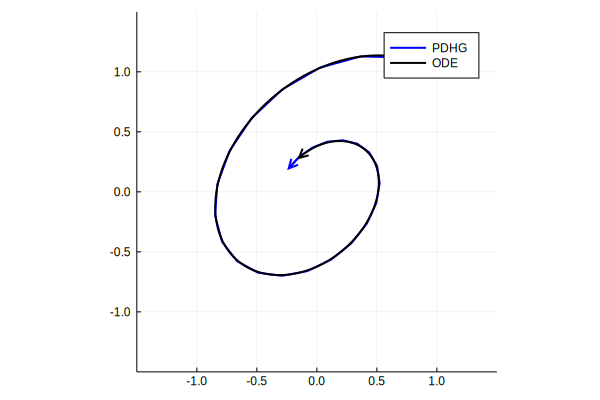

In [7]:
xylim=1.5
solutions_pdhg = pdhg_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_pdhg = ODEProblem(pdhg!,x0,tspan)
sol_pdhg = solve(ODE_pdhg);
plot(solutions_pdhg[1,:], solutions_pdhg[2,:], color=:blue, linewidth=2, label="PDHG", arrow=0.5, dpi=100)
plot!(sol_pdhg, vars=(1,2), color=:black, linewidth=2, label="ODE", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))